This notebook is a simple introduction to pytorch, assuming you already know  python, numpy and the notebooks.


To start with pytorch, here are some external websites:
* http://pytorch.org/tutorials/ : official tutorials
* http://pytorch.org/docs/master/ : official documentation

Before, check the version of pytorch

In [1]:
import torch as th
print(th.__version__)


1.12.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


You should have a version of at least 1.0.0.


## Tensor  overview
For users who are familiar with numpy arrays, the PyTorch **Tensor** class is very similar. PyTorch is like NumPy, but with GPU acceleration and automatic computation of gradients. This  makes it suitable for deep learning: calculating backward pass data automatically starting from a forward expression.

The forward pass is implemented as a computation graph. The **Tensor** is the basic piece of this computation graph, to encode the data (input/output) and the parameters of the model.
A Tensor is both a tensor (like a numpy array or a matlab matrix) and a variable (or a node) of the computation graph. A Tensor can store data and the associated gradients.



**IMPORTANT NOTE: ** Since torch 0.3, a **Tensor** is a **Variable** that wraps a tensor. Before these 2 concepts were separated.

## Module overview

A module is a part of a NNet. It may contains Tensors. The core PyTorch modules for building neural networks are located in *torch.nn*, which provides common neural network layers and other architectural components. Fully connected layers, convolutional layers, activation functions, and loss functions can all be found here. Modules can be seen as pre-built pieces of computation graph.

A simple example of *module* is **Linear**: it's a fully connected layer, so a linear transformation of the input. It contains a matrix of parameters (a Tensor). Activation function are also *module*. You can therefore create a cascade of *Linear* module with a *Sigmoid*, for example.

A special kind of module is a *container* : a module that contains other module. The most widely used is **Sequential**: it's a container to implement a feed-forward network. When you create a **Sequential** object you pass him an ordered list of modules to create the cascade of operation.





# Tensor

To start with  *Tensor*s, read this link first :
http://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html.
and then look at the operations on tensors:  http://pytorch.org/docs/master/torch.html.

## Basics
You should know how to :
* Build a tensor of dimensions (2,3) filled with 1.
* Build a tensor of dimensions (2,3) filled with 0.
* Build a tensor of dimensions (2,3) filled with integers from 1  to 6.
* Compute the sum of its elements, the sum per rows and per columns.
* Build a tensor of dimensions (3,2) filled with random numbers. Numbers are drawn from the uniform distribution on [0,1]
* Same with a gaussian  (mean=0, variance=1).
* Convert this  Tensor in array numpy and back.

Your turn to code but remember:
- you can use auto-completion
- ask for help, like this :
But in most of the case it is easier to use the online documentation of the function: https://pytorch.org/docs/stable/torch.html#torch.arange

In [ ]:
# A hint
help(th.arange())


Help on built-in function arange in module torch:

arange(...)
    arange(start=0, end, step=1, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a 1-D tensor of size :math:`\left\lceil \frac{\text{end} - \text{start}}{\text{step}} \right\rceil`
    with values from the interval ``[start, end)`` taken with common difference
    :attr:`step` beginning from `start`.
    
    Note that non-integer :attr:`step` is subject to floating point rounding errors when
    comparing against :attr:`end`; to avoid inconsistency, we advise adding a small epsilon to :attr:`end`
    in such cases.
    
    .. math::
        \text{out}_{{i+1}} = \text{out}_{i} + \text{step}
    
    Args:
        start (Number): the starting value for the set of points. Default: ``0``.
        end (Number): the ending value for the set of points
        step (Number): the gap between each pair of adjacent points. Default: ``1``.
    
    Keyword args:
        out 

## Operation and access

* Extract the first row and the last row (do the same with columns)
* Build a matrix  A of dimension (2,3), a matrix  B (2,1) et and  C (1,4) with random initialisation.
* Concatenate A with B, and the results with avec C.
* Create A (5,4), then B (3,4) which contains in this order: the second, the first and the fourth row of A.

In [ ]:
a = th.rand(5,4)
b = a[[1,0,4]]
print(a)
print(b)


Look at the following code and how  x2 is built from x.

In [ ]:
x = th.randn(5, 4)
print(x)

x2= th.stack((x,x) , dim=0)
print (x2[0])
print (x2.size())

x2= th.stack((x,x) , dim=1)
print (x2[0])
print (x2.size())

x2= th.stack((x,x) , dim=2)
print (x2[0])
print (x2.size())


## Reshape

The method **.view()** is similar to *reshape*. This is important since with neural net, you will often need to play with dimensions.

* Build a tensor of size (2, 3, 4)
* Convert it in a matrix of dimension (3,8) and (2,12)
* What is the effect of *view(2,-1)*  ?

## Auto-grad

`torch.autograd` provides classes and functions implementing automatic differentiation.
When a tensor is created with `requires_grad=True`, the object will be able to store information about the gradient.
In the following example, we build a computational graph. The "end" must be a scalar for automatic differentiation.



In [ ]:
x = th.randn(1, 1, requires_grad=True)
print("x:",x)
print("x.grad:",x.grad)

x: tensor([[-1.1098]], requires_grad=True)
x.grad: None


To build a computational graph using x, we just need to create new variables using torch operation.

In [ ]:
y = 2*x+1
print(y)
y.backward()
print(x.grad)

tensor([[-1.2197]], grad_fn=<AddBackward0>)
tensor([[4.]])


Can you interprete and understand the result ?

Now we can introduce a new variable w, tensor as well.

In [ ]:
w = th.randn(1,1, requires_grad=True)
print(w)

In [ ]:
z = w*x
z.backward()
print(x.grad)
print(w.grad)

What do you think about the result ?


It is worth noticing that the gradient is a tensor operation on a scalar value: we compute the partial derivative of a scalar quantity w.r.t a tensor. The variable on which we run the backward must be a single value.

Let us consider the following code for instance:

In [ ]:
x = th.randn(2,2,requires_grad=True)        # x is a square matrix
print(x)
out = 0.5*x.pow(2).sum() # out is a new variable (scalar)
out.backward()           # back propagation in the graph
print("g:",x.grad)       # the gradient of out with respect to x
print("x:",x)            # A simple check. Is it what expected ?

And for this example, can you explain the results ?

In [ ]:
x = th.randn(2,2,requires_grad=True)        # x is a square matrix
print(x)
w = th.ones(2,2,requires_grad=True)
print(w)
out = 0.5*(w@x).pow(2).sum() # out is a new variable (scalar)
out.backward()           # back propagation in the graph
print("x:",x)
print("x.grad:",x.grad)  # the gradient of out with respect to x
print("w:",w)
print("w.grad:",w.grad)  # the gradient of out with respect to x

# A simple dataset
Let start with an easy dataset for binary classification. The following subsections just provide a dummy dataset and function to visualize the data-set.



## Create the data


In [ ]:
import numpy as np
ST1 = np.array([[17.0 ,12 ,13 ,15 ,15 ,20 ,20],[ 10 ,12 ,14 ,15 ,20 ,15 ,20]]) # class 1
ST2 = np.array([4, 7.5, 10 ,11, 5 ,5 ,6, 8, 5, 0, 5, 0, 10, 6]).reshape(2,7) # class 2
Xstudents = np.concatenate((ST1,ST2),axis=1)

Ystudents = np.ones(14)
Ystudents[7:] = 0



(2, 14)


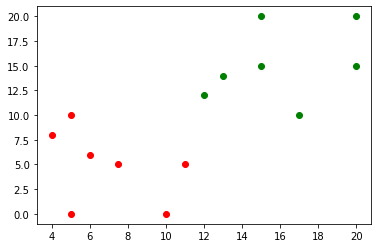

In [ ]:
import matplotlib.pyplot as plt
print(Xstudents.shape)
sel = Ystudents == 0
plt.scatter(Xstudents[0,sel],Xstudents[1,sel], c='red')
sel = Ystudents == 1
plt.scatter(Xstudents[0,sel],Xstudents[1,sel], c='green')

Can you plot the dataset with two colors (one for each class) ?


# pyTorch


Define a logistic regression model with pytorch, learn it and vizualise the result.
The roadmap is:
* A simple neural model can rely on  **Sequential**. A model handles  **Tensors**. The data for a model should be converted into Tensors. Start by this transformation.
* Create a regression model  (a single neuron with the logistic activation function, or a linear layer with one single neuron with the logistic activation).
* Define the '**optimizer** (Take the basic Stochastic Gradient Descent).
* Define the objective function
* Write the training loop and run it until convergence. It can be useful to play with learning rate. Run the gradient descent example by example.
* Look at the solution
* Start again in  **batch** mode (the gradient is estimated on the whole training set).



## From data to tensors / variables


In [ ]:
X = th.FloatTensor(Xstudents.T)
print(X)
print(X.shape)

Y=th.FloatTensor(Ystudents)
print("Y=",Y,Y.shape)
print ("One i/o")
print(X[1],X[1].shape)
print(Y[1])

tensor([[17.0000, 10.0000],
        [12.0000, 12.0000],
        [13.0000, 14.0000],
        [15.0000, 15.0000],
        [15.0000, 20.0000],
        [20.0000, 15.0000],
        [20.0000, 20.0000],
        [ 4.0000,  8.0000],
        [ 7.5000,  5.0000],
        [10.0000,  0.0000],
        [11.0000,  5.0000],
        [ 5.0000,  0.0000],
        [ 5.0000, 10.0000],
        [ 6.0000,  6.0000]])
torch.Size([14, 2])
Y= tensor([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.]) torch.Size([14])
One i/o
tensor([12., 12.]) torch.Size([2])
tensor(1.)


## Create the model, its loss and optimizer

The model is a linear transformation followed by a Sigmoid function. This is equivalent to a logistic regression model.

In [ ]:
# The model
D_in=2  # input size : 2
D_out=1 # output size: one value
model = th.nn.Sequential(
    th.nn.Linear(D_in, D_out),
    th.nn.Sigmoid()
)
print(model)


loss_fn = th.nn.BCELoss() # The binary cross entropy
learning_rate = 1e-2
optimizer = th.optim.Adam(model.parameters(), lr=learning_rate) #

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)


## Testing the model with data

In [ ]:
# With a single input vector
prediction = model(X[0]) # or prediction = model.forward(X[0]) both are equivalent

print("For the first input: ",prediction)

# With 3 input vectors
prediction = model(X[0:3])
print("For the 3 first inputs: ",prediction)

# For the whole dataset
prediction = model(X)
print("For all: ",prediction)



For the first input:  tensor([0.9946], grad_fn=<SigmoidBackward0>)
For the 3 first inputs:  tensor([[0.9946],
        [0.9990],
        [0.9997]], grad_fn=<SigmoidBackward0>)
For all:  tensor([[0.9946],
        [0.9990],
        [0.9997],
        [0.9998],
        [1.0000],
        [0.9997],
        [1.0000],
        [0.9927],
        [0.9376],
        [0.3312],
        [0.9200],
        [0.4204],
        [0.9978],
        [0.9698]], grad_fn=<SigmoidBackward0>)


In [ ]:
# With a single input vector
prediction = model(X[0])
print("The first prediction: ",prediction, prediction.shape)
print("The reference: ",Y[0], Y[0].shape)

loss_fn(prediction,Y[0].unsqueeze(0))



The first prediction:  tensor([0.9946], grad_fn=<SigmoidBackward0>) torch.Size([1])
The reference:  tensor(1.) torch.Size([])


tensor(0.0055, grad_fn=<BinaryCrossEntropyBackward0>)

This code should generate a warning, since the label (or target value) and the prediction (considered as the input value of the loss) are of different dimensions.

There is two ways to fix that. The first one is to reduce the input dimension using *squeeze*. The second one is to modify the target values. See the two cells below.

In [ ]:
prediction = model(X[0]).squeeze()
print("The first prediction: ",prediction, prediction.shape)
print("The reference: ",Y[0], Y[0].shape)

loss_fn(prediction,Y[0])



The first prediction:  tensor(0.9946, grad_fn=<SqueezeBackward0>) torch.Size([])
The reference:  tensor(1.) torch.Size([])


tensor(0.0055, grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
prediction = model(X[0])
Ymodified = Y.view(-1,1)
print("The first prediction: ",prediction, prediction.shape)
print("The reference: ",Ymodified[0], Ymodified[0].shape)

loss_fn(prediction,Ymodified[0])


The first prediction:  tensor([0.9946], grad_fn=<SigmoidBackward0>) torch.Size([1])
The reference:  tensor([1.]) torch.Size([1])


tensor(0.0055, grad_fn=<BinaryCrossEntropyBackward0>)

## Training loop

Now we have everything to train the model.

In [ ]:
# TODO

0 0.0756419450044632
100 0.05695043131709099
200 0.04321214556694031
300 0.03299960494041443
400 0.025336788967251778
500 0.019541459158062935
600 0.01512901857495308
700 0.011750523932278156
800 0.009151503443717957
900 0.007144039496779442


It is better to visualize the evolution of the loss function: to be sure that everything went well. The idea is to store the loss values in a numpy array and then to plot it.

**TODO:** Modify the code above to do that.

## Explore the "solution"

Here, we look at the different wrapping steps:
- The model is a set of modules
- A Linear module is a matrix of weights along with a bias vector. They are parameters.
- A Parameter wrap a tensor
- A tensor can be casted as a numpy array


In [ ]:
mod = model[0]
print(type(mod))
print(type(mod.bias))
print(type(mod.bias.data))
print(type(mod.bias.data.numpy()))


We can look at the parameters:

In [ ]:
print(mod.bias.data.view(1,1))
print(mod.weight.data)

## Impact of the learning rate

Now, we will use the same model trained with a different learning rate. The training process restarts from scratch. We need to therefore to re-create the model and the associated optimizer.

We now have the same model as before, randomly initialized. We train this same model with a different learning rate, a larger one.

- Run the training with the same number of epochs and compare the loss value we get at the end
- Do you think we can reach the same value with the learning rate of 1e-2, but with a longer training ?
- Try the same thing with a learning rate of 0.5, what do you observe ?

